In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [6]:
# Какие значения в переменной y
y.value_counts()

,count
Diagnosis,
B,357
M,212


In [7]:
# Объединим всё в один датафрейм
import pandas as pd
# Объединение по столбцам
df = pd.concat([X, y], axis=1)


In [8]:
# Загрузим инструменты для работы
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import ( # для кроссвалидации
    StratifiedKFold,
    cross_validate,
    cross_val_score,
    KFold
)

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    roc_curve,
    average_precision_score,
    precision_recall_curve,
    classification_report,
    )

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_swiss_roll

import torch
import torch.nn as nn
import torch.optim as optim

import os
import statsmodels.api as sm
import scipy.stats as stats
import networkx as nx
import random
from sklearn.model_selection import GridSearchCV
import time

In [9]:
# Проверим, что получилось
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [11]:
# Закодируем признак с диагнозом
df['Diagnosis'] = df['Diagnosis'].map({
    'B' : 0,
    'M' : 1
})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [13]:
# Проверим таблицу на наличие дубликатов
df.duplicated().sum()

0

Дубликатов нет

In [14]:
# Посмотрим описательную статистику
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture1,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter1,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area1,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness1,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness1,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity1,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points1,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry1,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension1,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


Проверим распределение данных

In [15]:
# Отключим предупреждения
import warnings
warnings.filterwarnings('ignore')

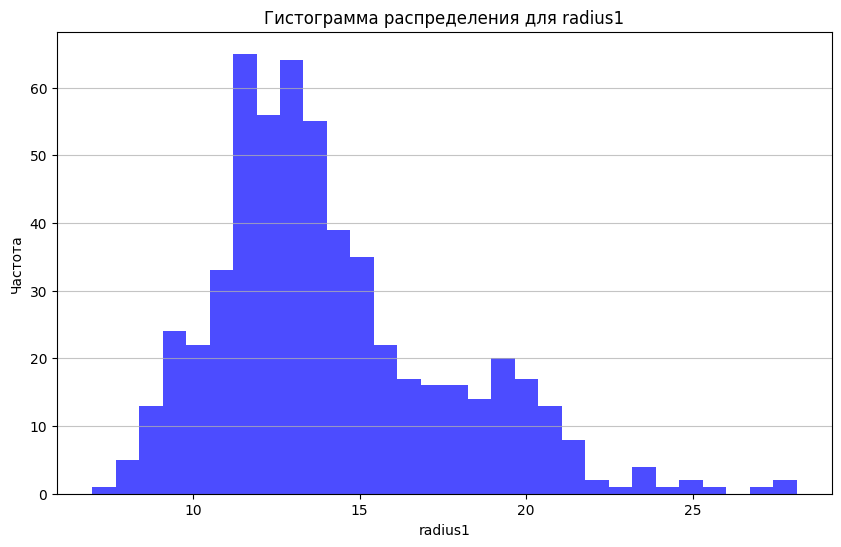

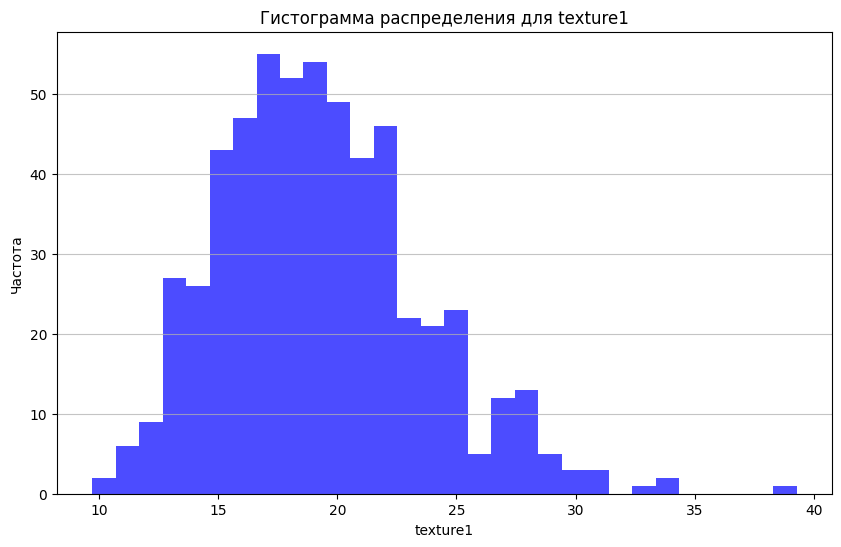

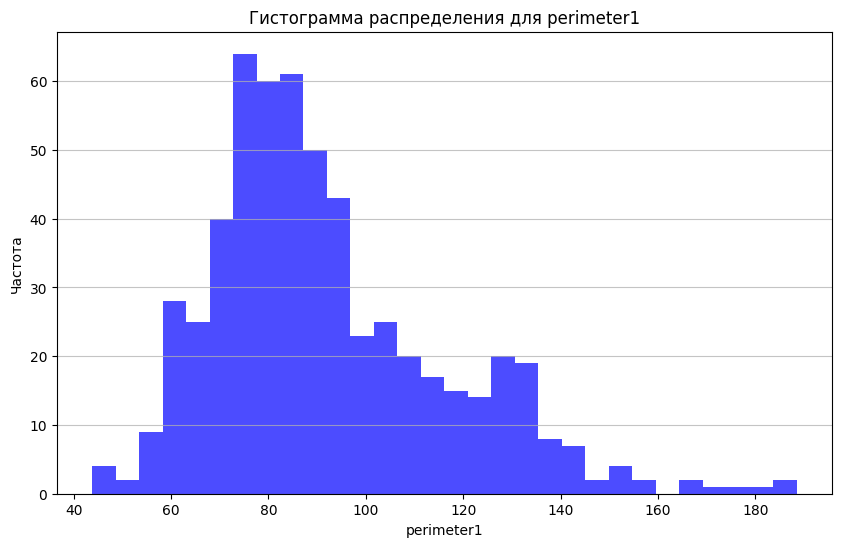

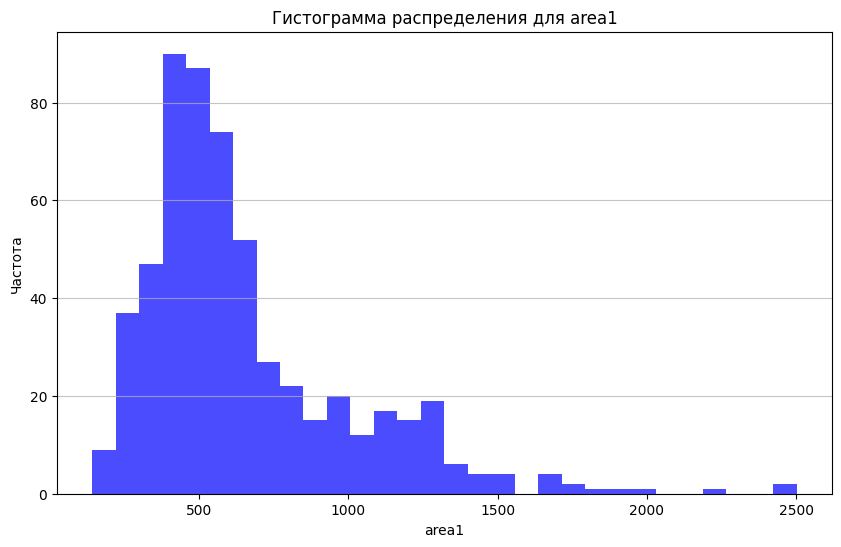

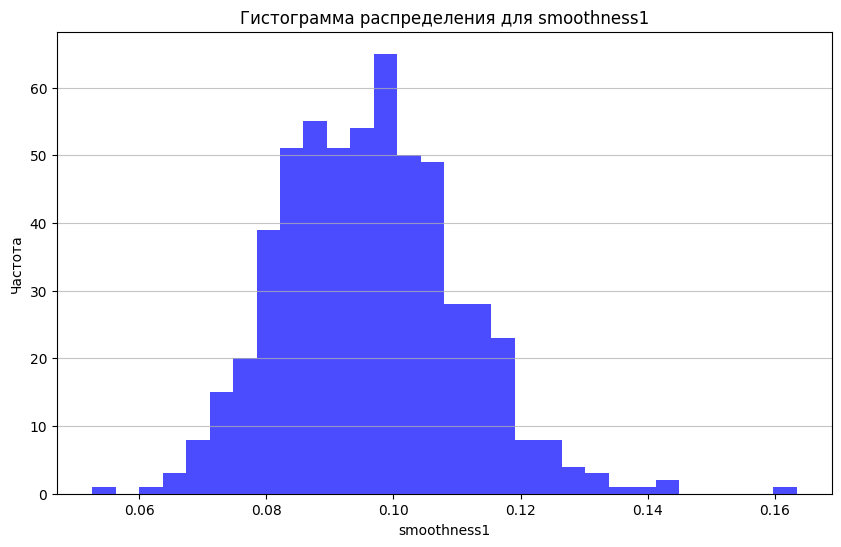

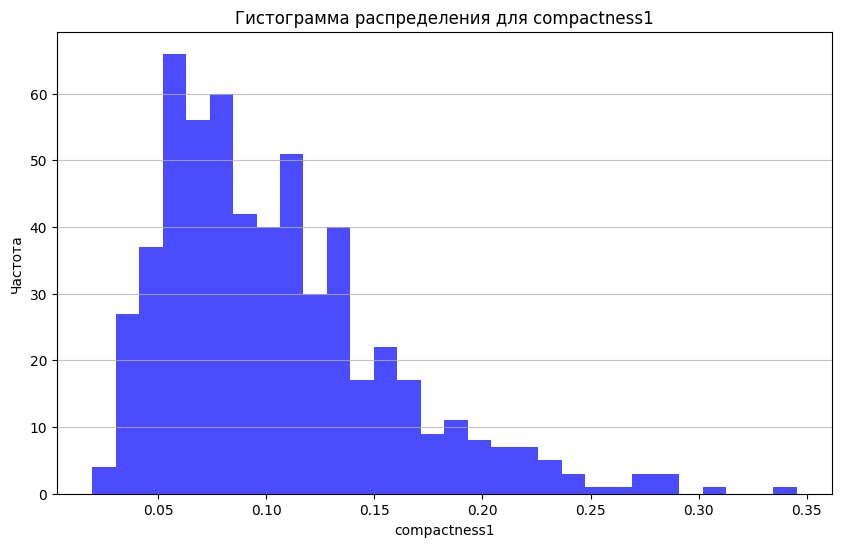

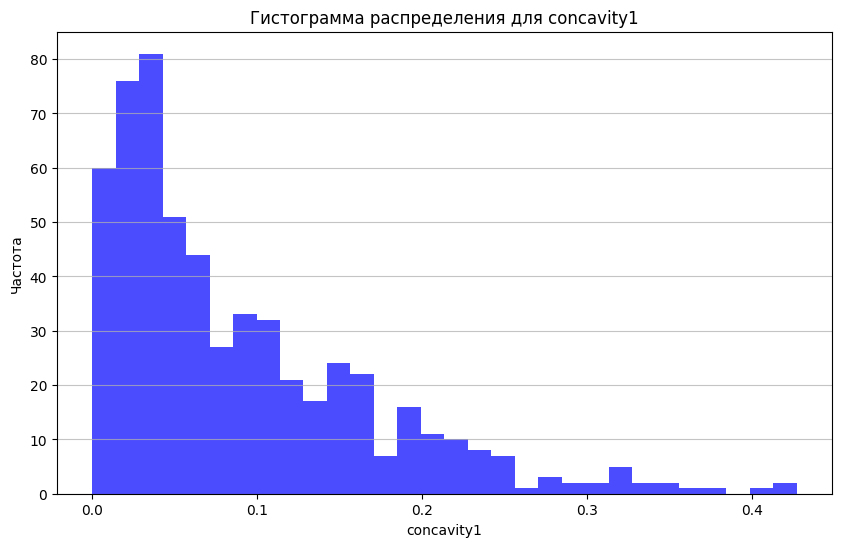

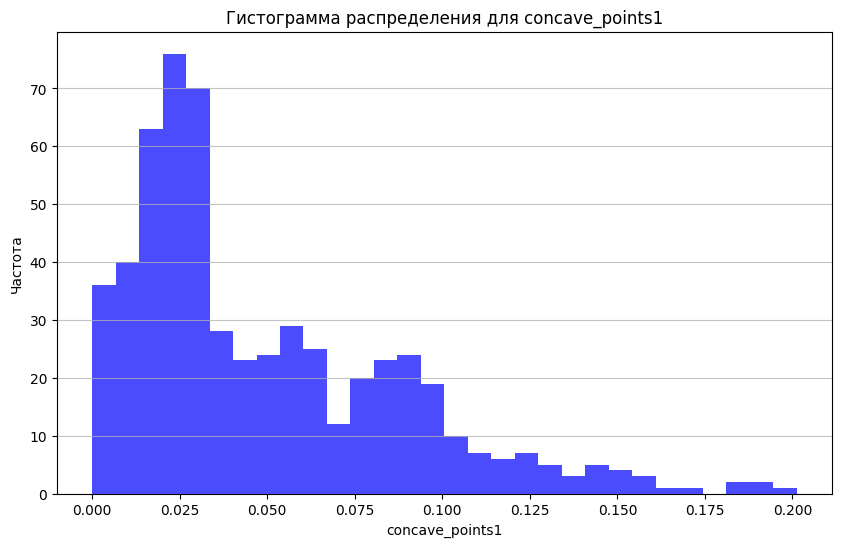

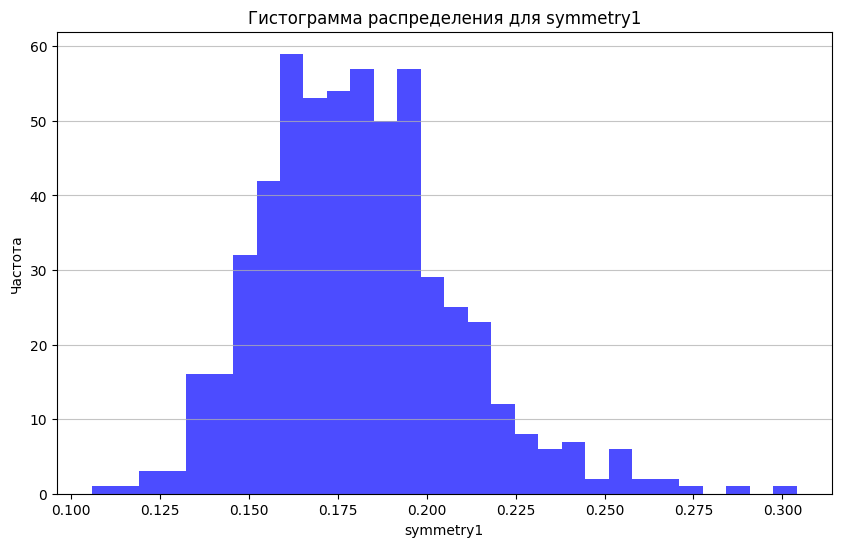

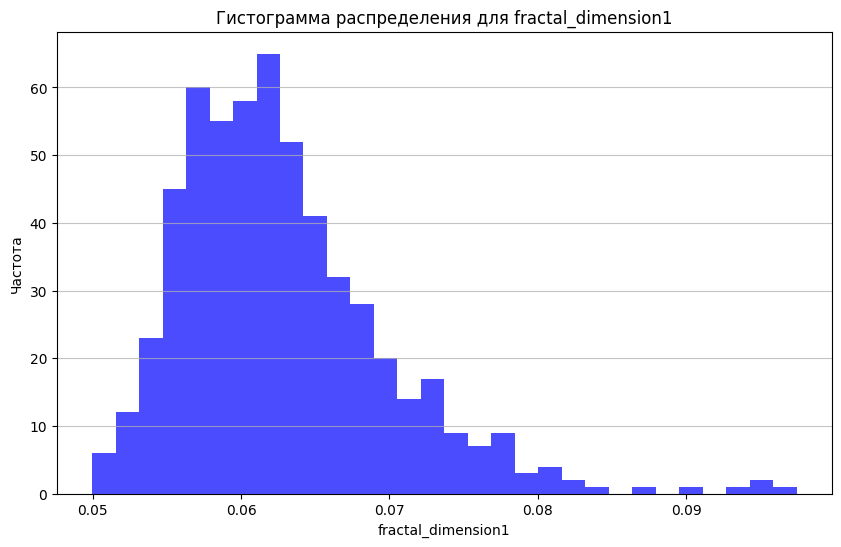

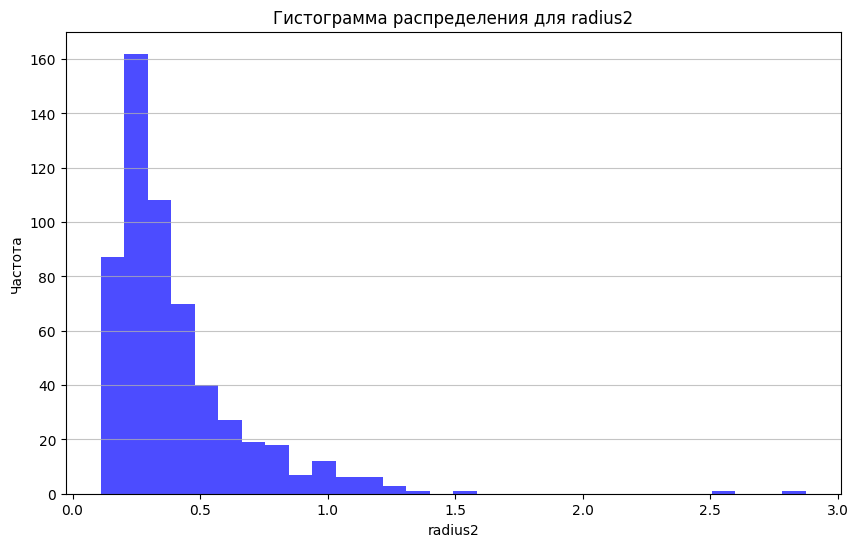

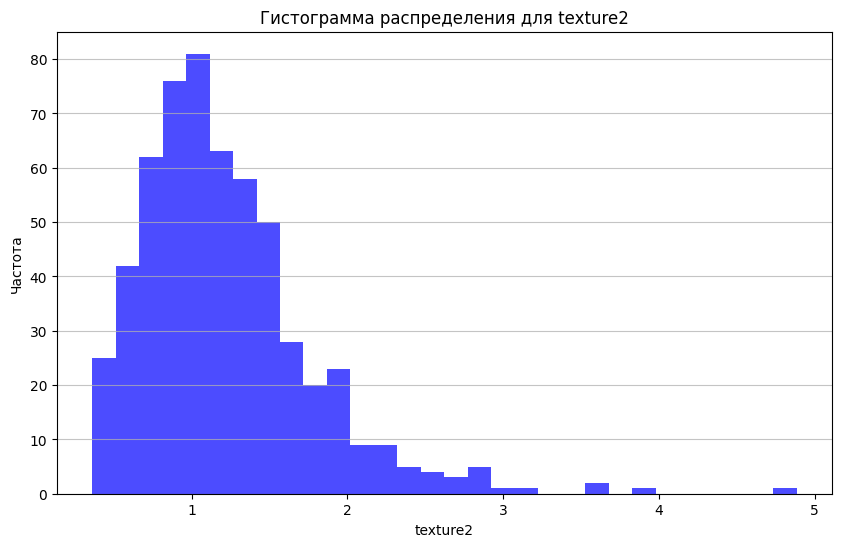

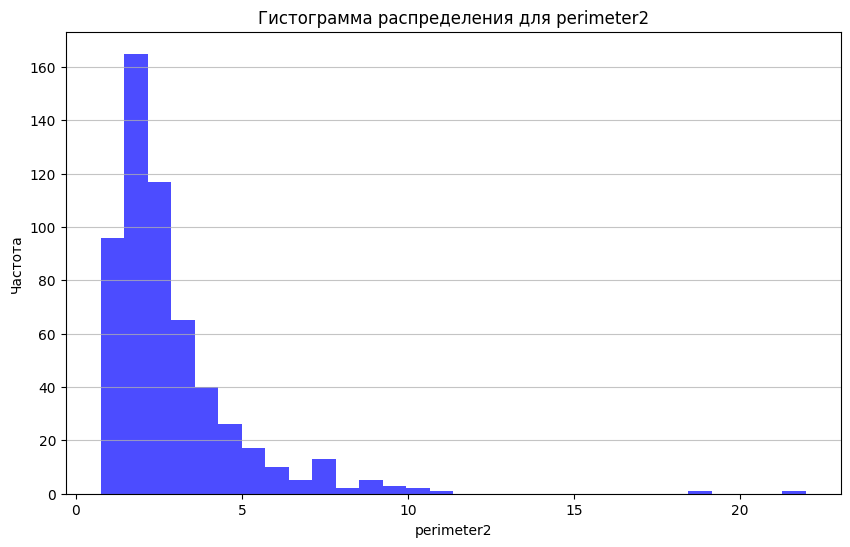

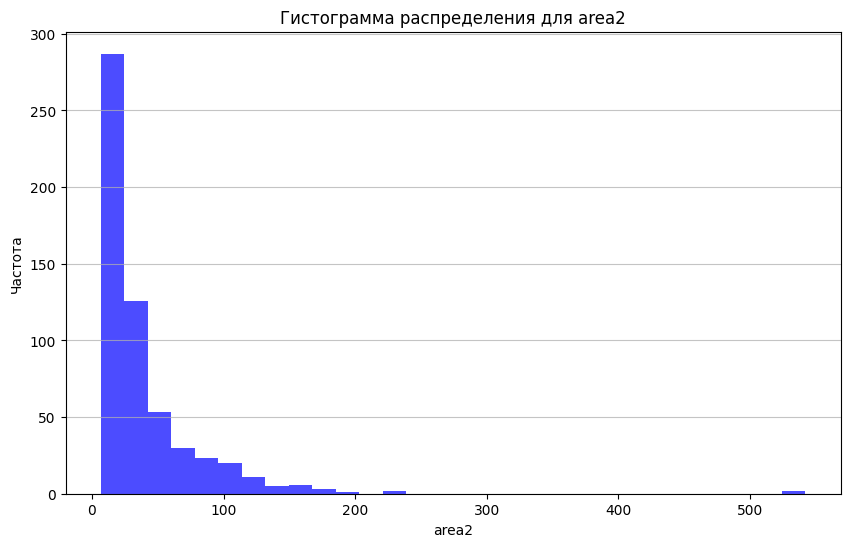

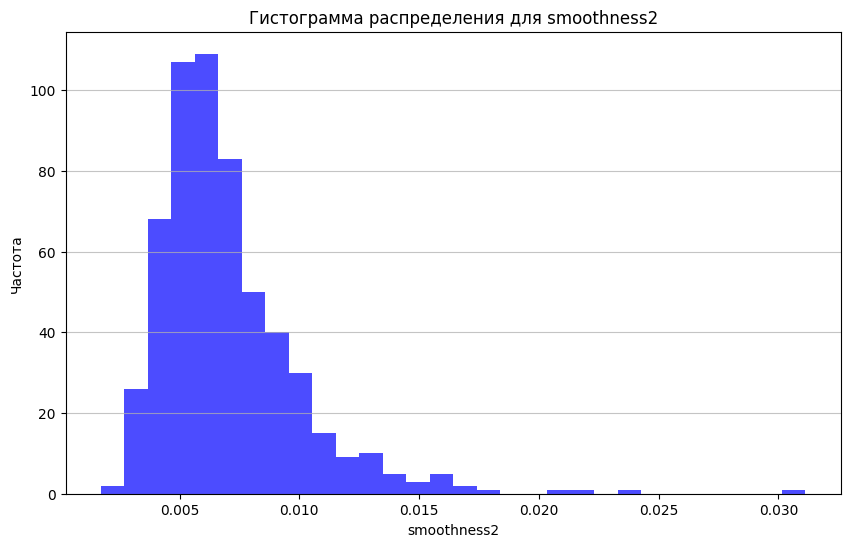

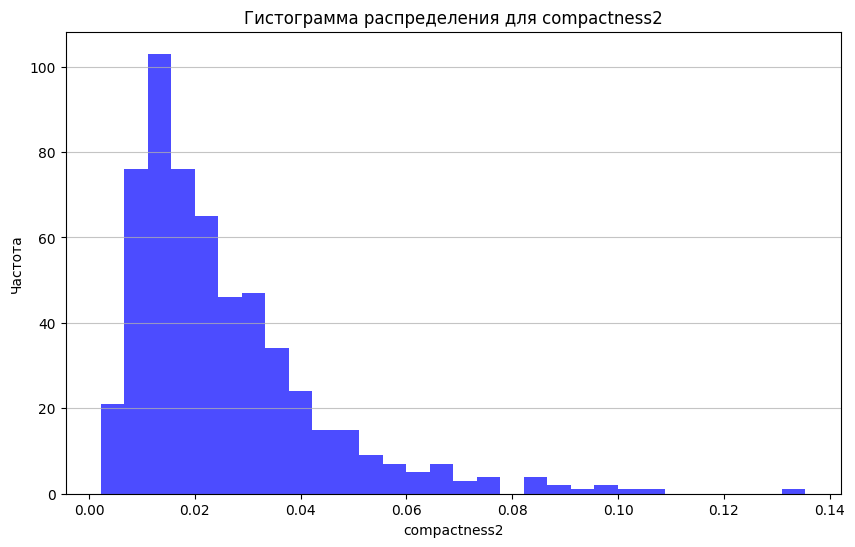

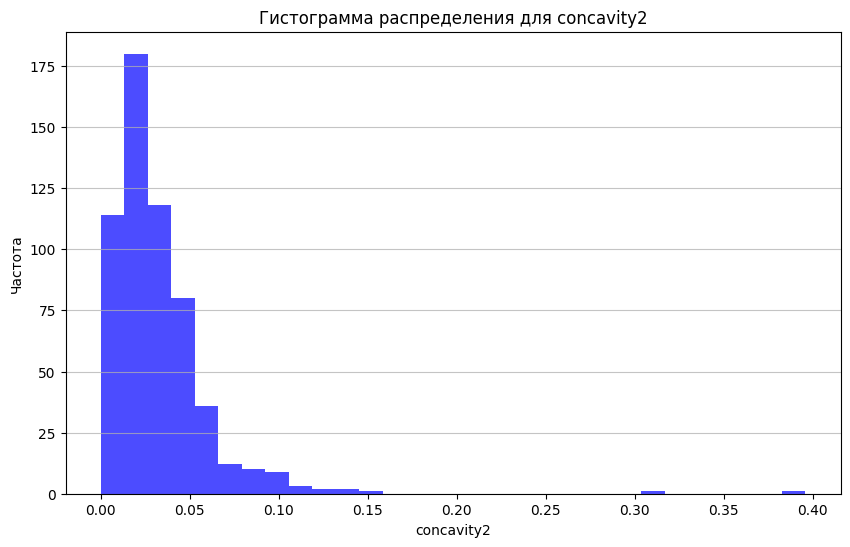

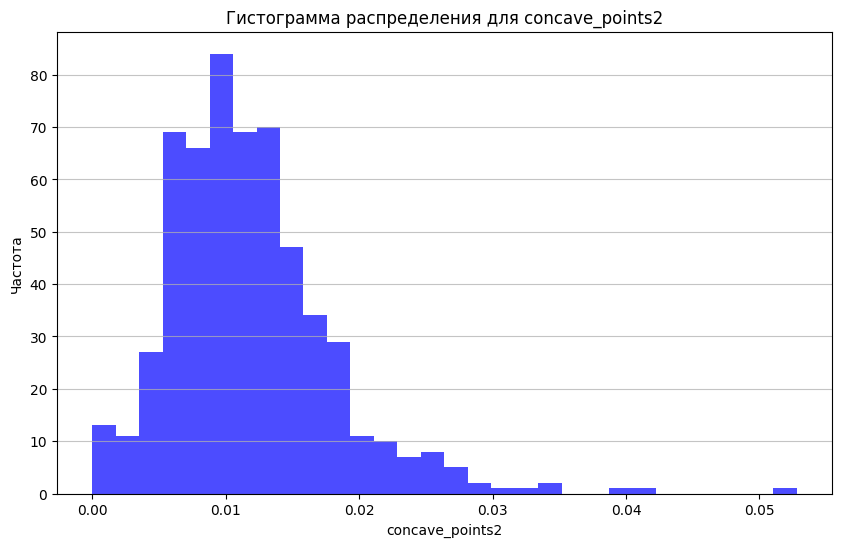

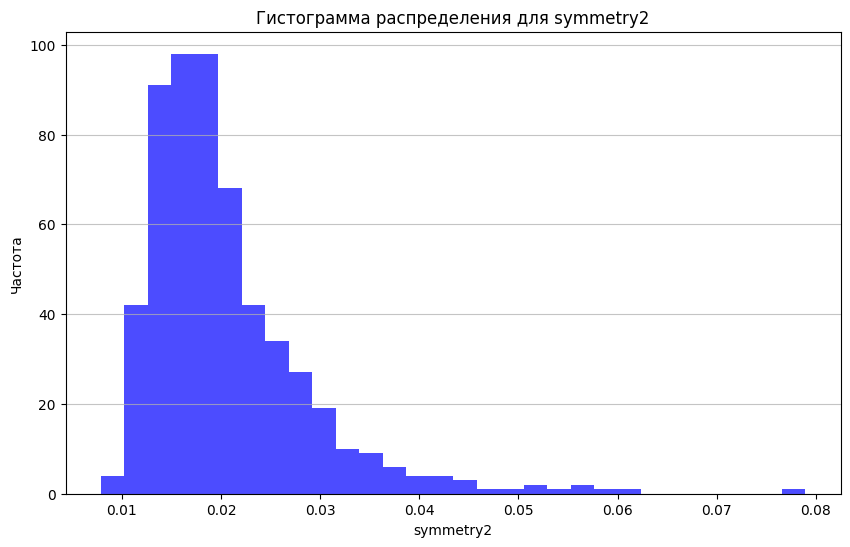

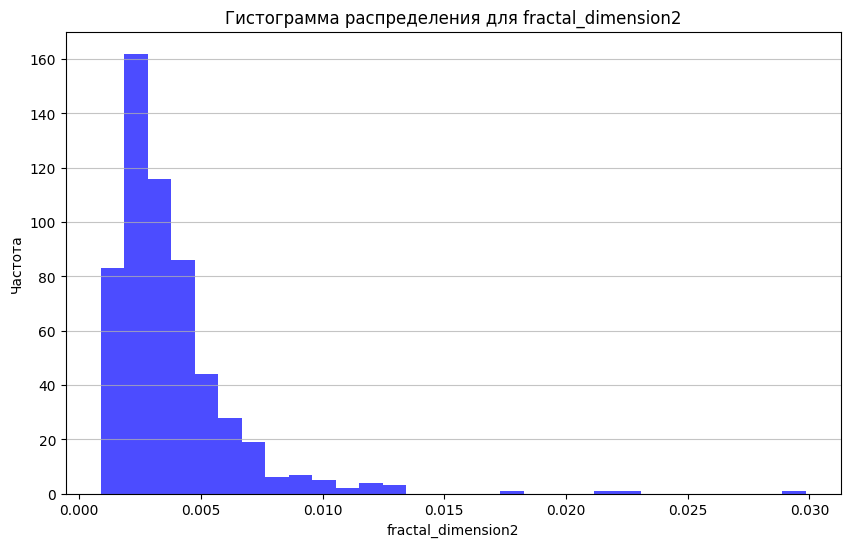

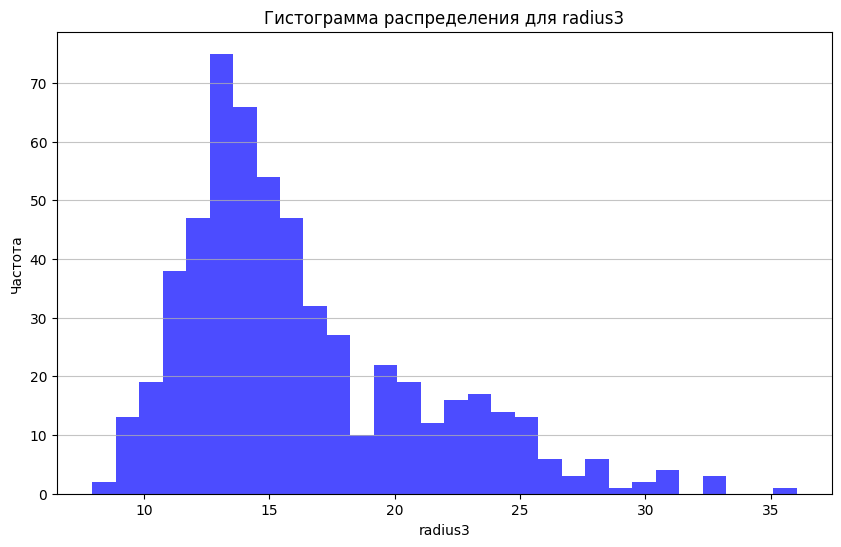

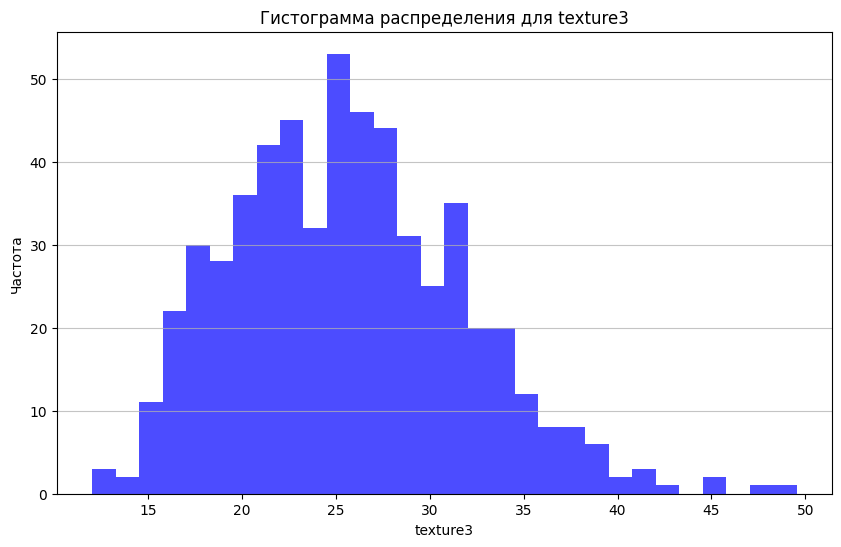

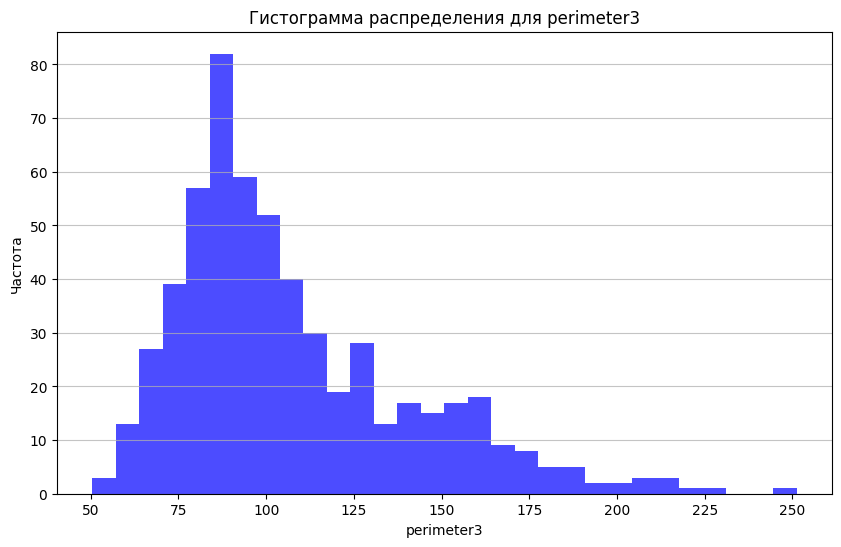

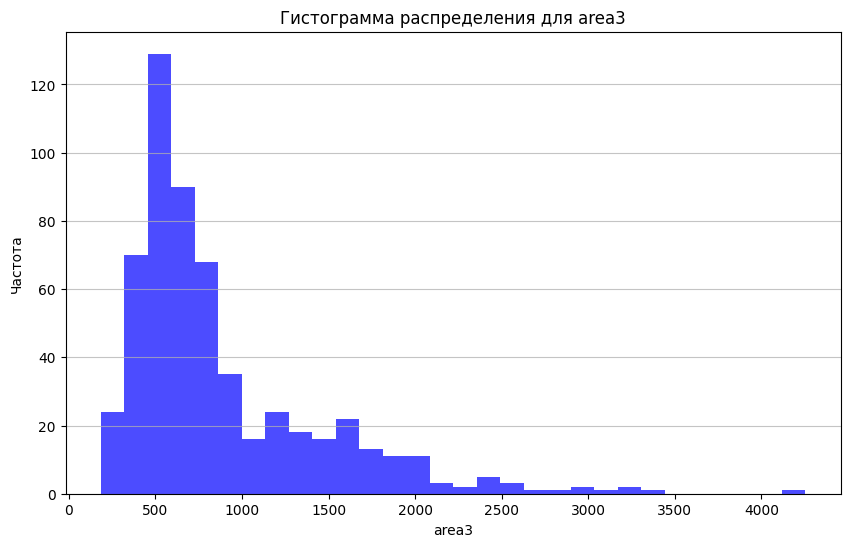

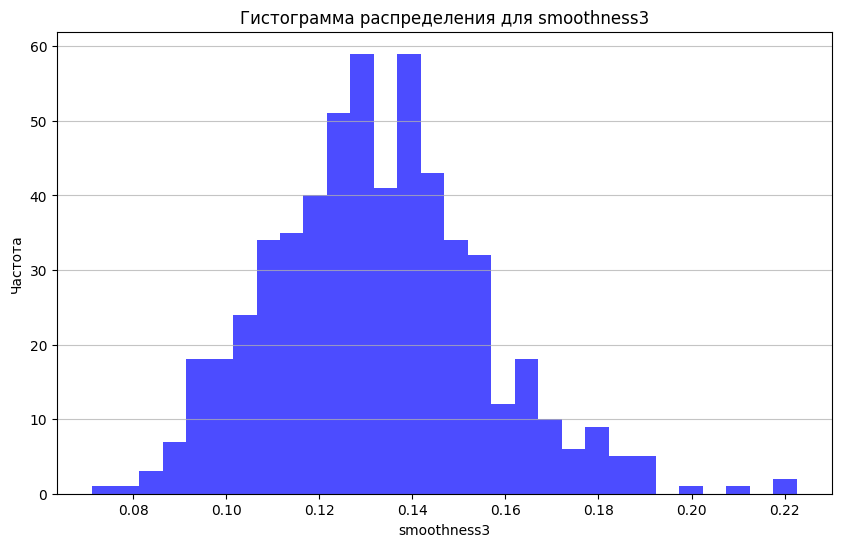

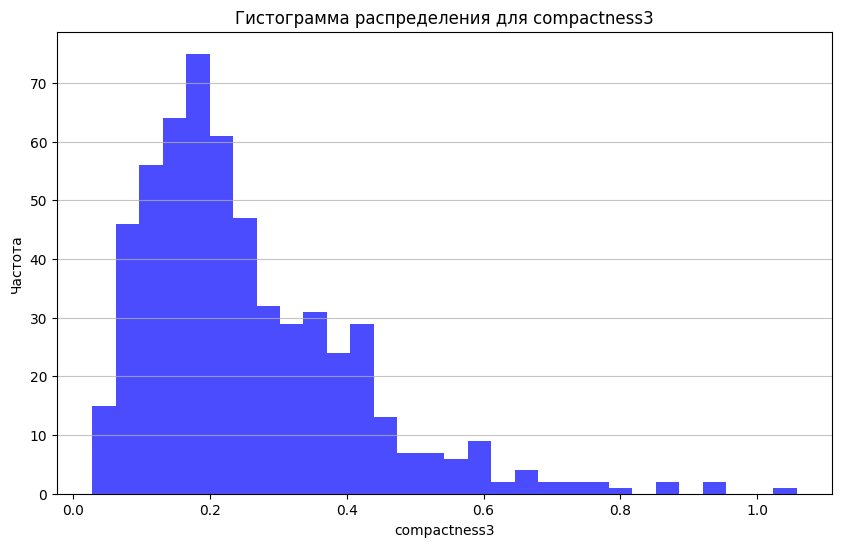

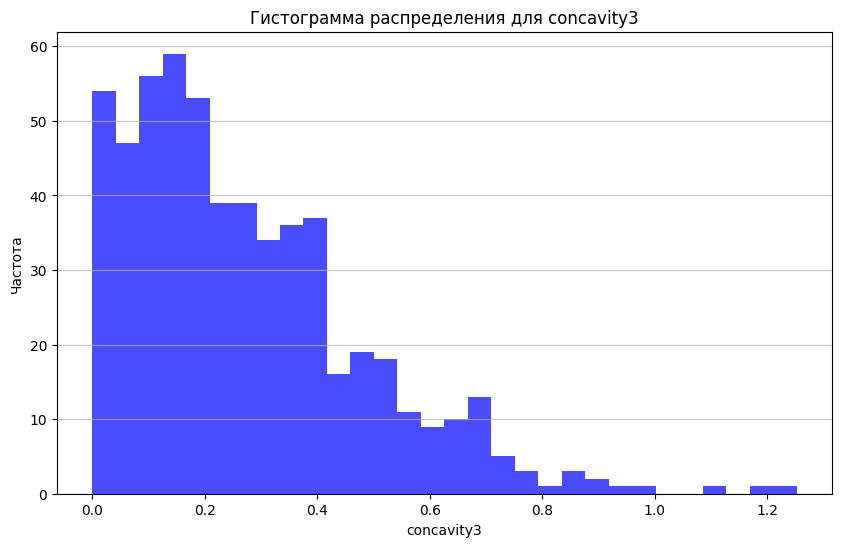

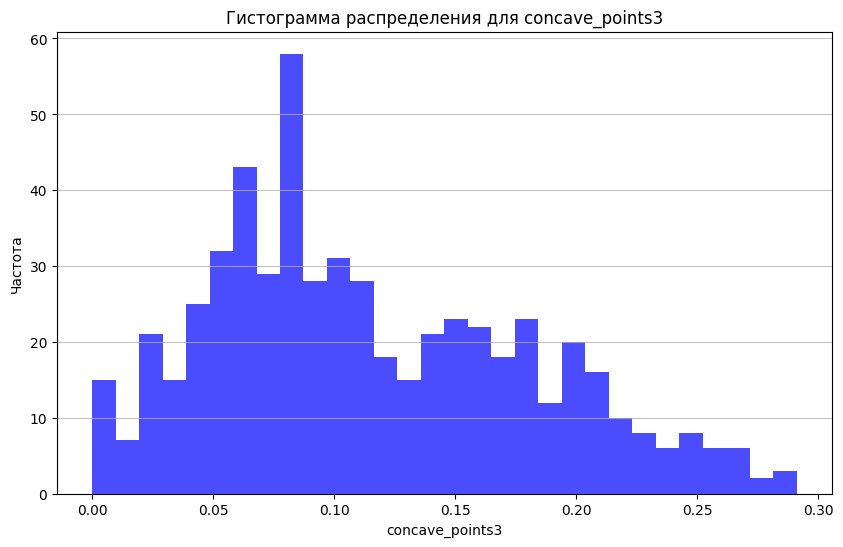

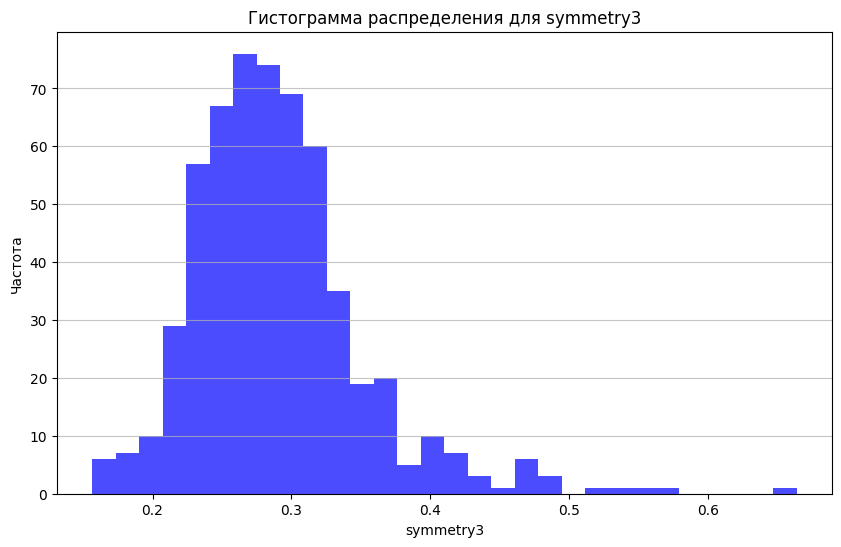

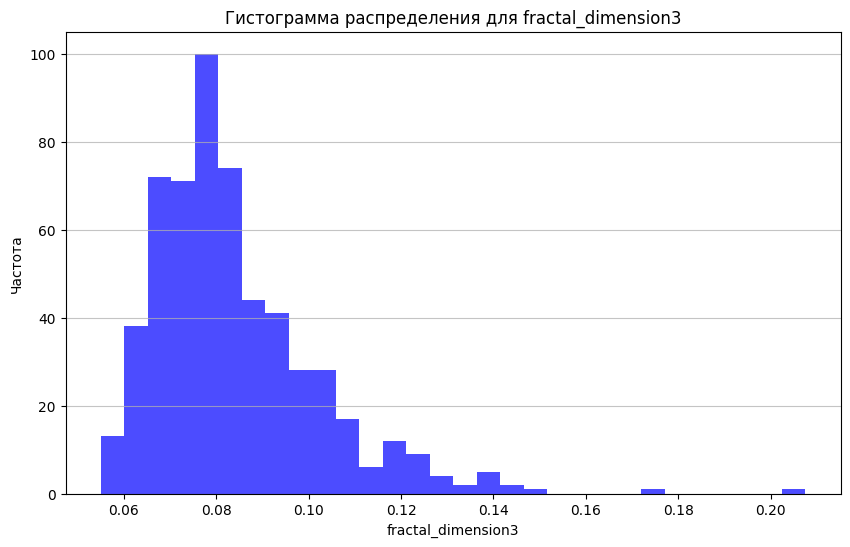

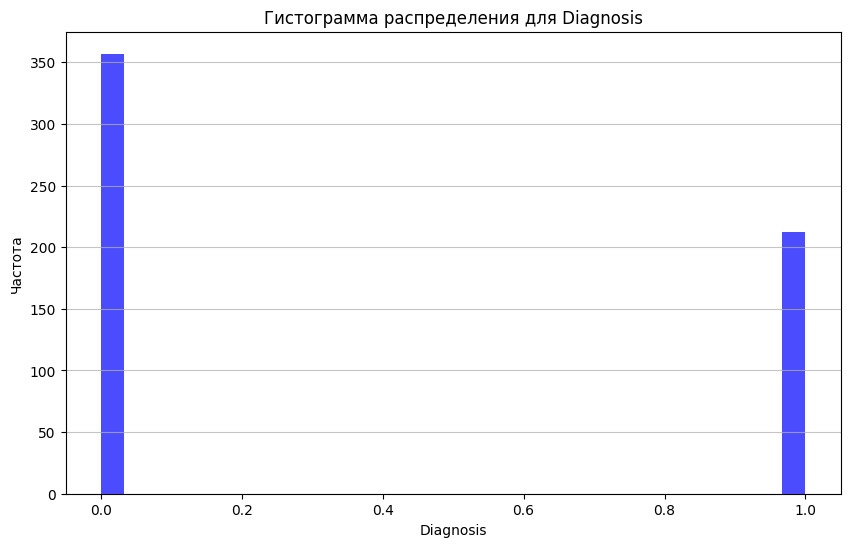

In [16]:
# Создаем гистограммы для каждой колонки
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, alpha=0.7, color='blue')
    plt.title(f'Гистограмма распределения для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Практически все столбцы содержат выбросы, которые могут значимо влиять на формирование конечных моделей. Распределение практически везде отличается от нормального. Отредактируем данные, чтоб остались только находящиеся в диапазоне двух IQR.

In [17]:
# Функция для фильтрации данных на основе 2 IQR
def filter_by_iqr(df):
    # Скопируем DataFrame, чтобы не изменять исходный
    filtered_df = df.copy()

    # Перебираем все столбцы в DataFrame
    for column in df.columns:
        # Вычисляем первый (25-й процентиль) и третий квартиль (75-й процентиль)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Вычисляем межквартильный размах (IQR)
        IQR = Q3 - Q1

        # Фильтруем данные, оставляя только те, которые находятся в пределах 2 IQR
        filtered_df = filtered_df[(df[column] >= Q1 - 2 * IQR) & (df[column] <= Q3 + 2 * IQR)]

    return filtered_df

# Применяем функцию к таблице
filtered_df = filter_by_iqr(df)

# Смотрим на новую таблицу
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 1 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             454 non-null    float64
 1   texture1            454 non-null    float64
 2   perimeter1          454 non-null    float64
 3   area1               454 non-null    float64
 4   smoothness1         454 non-null    float64
 5   compactness1        454 non-null    float64
 6   concavity1          454 non-null    float64
 7   concave_points1     454 non-null    float64
 8   symmetry1           454 non-null    float64
 9   fractal_dimension1  454 non-null    float64
 10  radius2             454 non-null    float64
 11  texture2            454 non-null    float64
 12  perimeter2          454 non-null    float64
 13  area2               454 non-null    float64
 14  smoothness2         454 non-null    float64
 15  compactness2        454 non-null    float64
 16  concavity2   

In [18]:
# Посмотрим сколько процентов строк осталось после обработки
round(filtered_df.shape[0]/df.shape[0] * 100, 2)

79.79

От исходной таблицы 79.79% осталось. С ними будем работать дальше

**Корреляционный анализ**

In [19]:
# Рассчитаем матрицу корреляций
corr_matrix = filtered_df.corr()

# вычислим ранг матрицы корреляций
rank = np.linalg.matrix_rank(corr_matrix)

# определим матрицу корреляций
det = np.linalg.det(corr_matrix)

print(f"Ранг матрицы корреляций: {rank}")
print(f"Определитель матрицы корреляций: {det:.3f}")

Ранг матрицы корреляций: 31
Определитель матрицы корреляций: 0.000


Определитель равен нулю. Есть линейная зависимость между колонками. Надо будет чистить данные. Визуализируем матрицу корреляции.

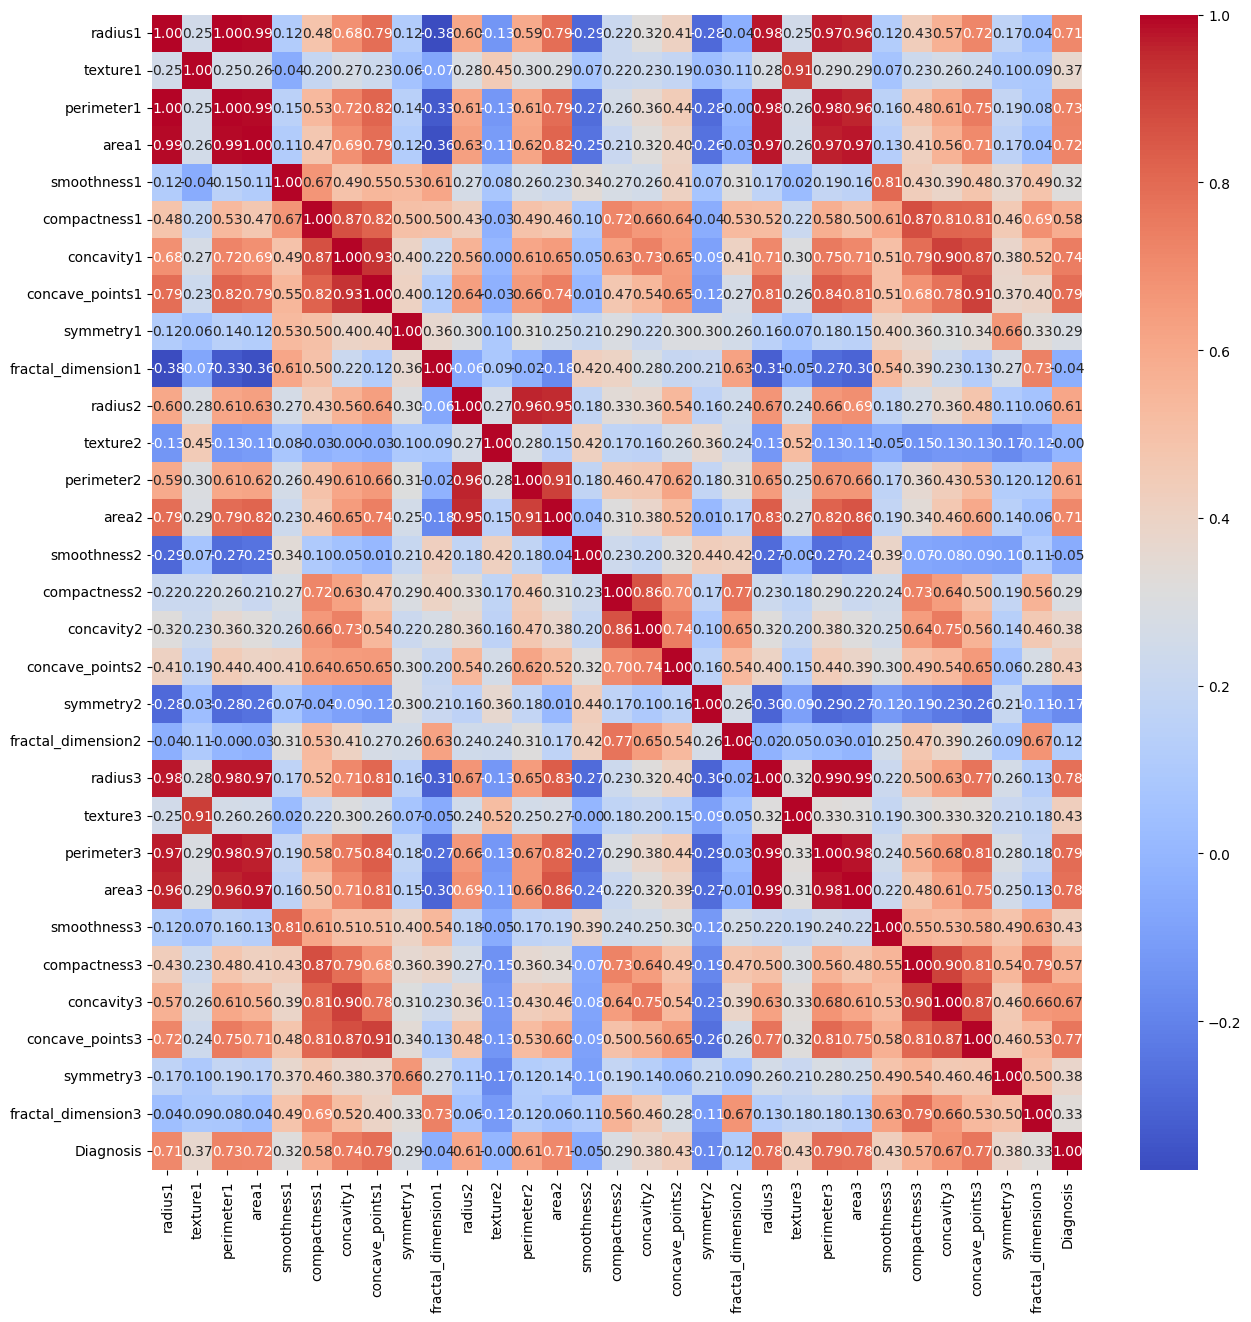

In [20]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Будем избавляться от следующих столбцов: perimeter1, area1, radius3, perimeter3, area3, smoothness3, radius2, area2, concavity2, concavity_points3

In [21]:
df_work = filtered_df.drop(['perimeter1', 'area1', 'radius3', 'perimeter3', 'area3', 'smoothness3', 'radius2', 'area2', 'concavity2', 'concave_points3'], axis=1)

In [22]:
# Смотрим на таблицу, на которой будем проводить обучение
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 1 to 568
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             454 non-null    float64
 1   texture1            454 non-null    float64
 2   smoothness1         454 non-null    float64
 3   compactness1        454 non-null    float64
 4   concavity1          454 non-null    float64
 5   concave_points1     454 non-null    float64
 6   symmetry1           454 non-null    float64
 7   fractal_dimension1  454 non-null    float64
 8   texture2            454 non-null    float64
 9   perimeter2          454 non-null    float64
 10  smoothness2         454 non-null    float64
 11  compactness2        454 non-null    float64
 12  concave_points2     454 non-null    float64
 13  symmetry2           454 non-null    float64
 14  fractal_dimension2  454 non-null    float64
 15  texture3            454 non-null    float64
 16  compactness3 

**Подготовка данных**

In [23]:
# Определение целевой переменной и признаков
X = df_work.drop(columns='Diagnosis')
y = df_work['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Проведём нормализацию
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Настройка логистической регрессии с подбором по сетке
param_grid = {
    'C': np.logspace(-10, 10, 20),
     'solver': ['lbfgs', 'liblinear', 'newton-cg','sag','saga'],
     'max_iter': [30, 70, 100, 150, 200, 300],
     'penalty': ['l2','l1', 'elasticnet','none'],
     'random_state': [42],
}

# Создаем модель логистической регрессии
log_reg = LogisticRegression()

# Настройка GridSearchCV с 7 фолдами
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=7, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Получаем лучшие параметры
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Предсказания на тестовой выборке
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
# Оценка модели
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 0.2976351441631313, 'max_iter': 30, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.92      0.96        25

    accuracy                           0.98        91
   macro avg       0.99      0.96      0.97        91
weighted avg       0.98      0.98      0.98        91


Confusion Matrix:
[[66  0]
 [ 2 23]]


Получилась прекрасная модель логистической регрессии.

Поробуем RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Инициализация модели и обучение
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Оценка качества модели
y_pred = rf.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred)

print(f"Точность без настройки: {accuracy_default:.2f}")

Точность без настройки: 0.93


In [29]:
# Подберём гиперпараметры по сетке
# Задание сетки гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Подбор гиперпараметров
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Лучшая модель и её точность
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Точность с оптимальными гиперпараметрами: {accuracy_best:.2f}")
print(f"Лучшие гиперпараметры: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Точность с оптимальными гиперпараметрами: 0.95
Лучшие гиперпараметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Всё равно регрессия дала результаты лучше

Нейросеть

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
# Создаём модель нейронной сети:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Оцениваем модель на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.5006 - loss: 0.7060 - val_accuracy: 0.8082 - val_loss: 0.5412
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8179 - loss: 0.5454 - val_accuracy: 0.9315 - val_loss: 0.4117
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8703 - loss: 0.4431 - val_accuracy: 0.9589 - val_loss: 0.3218
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8811 - loss: 0.3754 - val_accuracy: 0.9726 - val_loss: 0.2481
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9174 - loss: 0.2990 - val_accuracy: 0.9726 - val_loss: 0.1941
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9037 - loss: 0.2956 - val_accuracy: 0.9726 - val_loss: 0.1584
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9282 - loss: 0.2442 - val_accuracy: 0.9726 - val_loss: 0.1311
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9164 - loss: 0.2157 - val_accuracy: 0.9726 -

Точность получилось сопоставимой с линейной регрессией

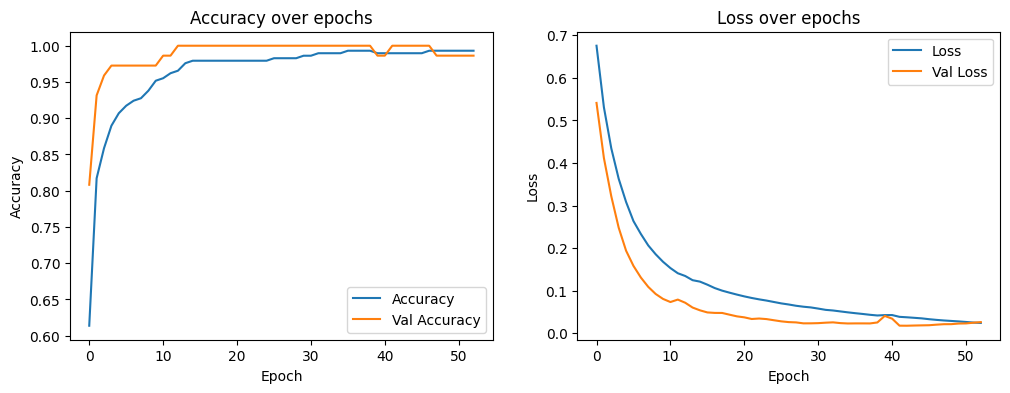

In [32]:
# графики обучения и проверки
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over epochs')
plt.show()